## PREVISÃO DE INADIMPLÊNCIA 
#### MACHINE LEARNING 

##### Importar as blibliotecas que serão usada: 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

##### Criar o dataframe da planilha de treino: 

In [2]:
df_treino1 = pd.read_csv('treino.csv', header=0, sep=',')

#Retirar as linhas que contenham valores nulos e possam interferir no modelo:
df_treino = df_treino1.dropna()

#Total de linhas retiradas da planilha:
print(f'Total retirado: {(len(df_treino1.index)) - (len(df_treino))} de um total de {len(df_treino1.index)}')  

Total retirado: 21763 de um total de 110000


##### Preprar as variáveis, a primeira coluna é a resposta de Inadimplência 

In [3]:
X = df_treino.drop('inadimplente', axis=1)
y = df_treino['inadimplente']

##### Dividir o conjunto em treino e teste: 
###### Parametro 0,2 indica que 20% do conjunto será usado para teste e 80% para treinamento 
###### Parametro 42, apenas 1 numero inteiro, para que a divisão dos dados seja sempre a mesma e o resultado seja reproduzível 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Modelo de aprendizado escolhido: RandomForestClassifier

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

### Treino do modelo:

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##### Resultado da avalição do modelo:

In [7]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy:', accuracy)
print('Confusion Matrix:', confusion)

Accuracy: 0.9325135992747053
Confusion Matrix: [[16231   187]
 [ 1004   226]]


##### Usar o modelo para prever novos resultados na planilha teste:

In [8]:
df_teste1 = pd.read_csv('teste.csv', header=0, sep=',')

#tirando linhas com dados nulos:
df_teste = df_teste1.dropna()
previsoes = model.predict(df_teste)

###### Criando nova coluna com a resposta e salvando em novo arquivo csv:

In [9]:
df_teste['inadimplente'] = previsoes
df_teste.to_csv('teste_com_inadimplente.csv', index=False)

C:\Users\dev_p\AppData\Local\Temp\ipykernel_7712\2655247539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['inadimplente'] = previsoes


### TESTANDO O MODELO NO ARQUIVO TREINO - RODANDO O MODELO NA PLANILHA E COMPARANDO COM A 1º COLUNA COMO RESPOSTA

##### Criar dataframe da planilha treino e aplicar o modelo de Machine Learning:
###### Dataframe com a coluna indadimplência, para verificar a resposta
###### Dataframe sem a coluna indimplência, para ser aplicado o modelo

In [10]:
df_treino1_teste = pd.read_csv('treino.csv', header=0, sep=',')

#Retirar as linhas com valores nulos:
df_treino_teste = df_treino1_teste.dropna()

#Criar um dataframde sem a coluna inadimplente
df_sem_resposta = df_treino_teste.drop('inadimplente', axis=1)

#Aplicar o modelo
previsao_treino = model.predict(df_sem_resposta)

##### Comparar o resultado obtido com o modelo e a coluna Inadimplente:
###### Criar uma lista com as respostas (Coluna inadimplente original):

In [12]:
resposta = df_treino_teste['inadimplente']

#Loop para trasnformar todos as respostas em inteiros:
resposta2 = []
for i in df_treino_teste['inadimplente']:
    resposta2.append(int(i))

###### Loop, se o resultado obtido no modelo for igual a resposta, o valor True é adicionado a lista resultado, se o valor for diferente, o valor False é adicionado a lista. 

In [13]:
resultado = []
for i in range(len(previsao_treino)):
    if resposta2[i] == previsao_treino[i]:
        a = True
    else:
        a = False
    resultado.append(a)

##### Analisando o resultado:
###### Total de resultados certos (True)
###### Total de resultados errados (False)

In [14]:
t = resultado.count(True)
f = resultado.count(False)

In [15]:
print(f'Percentual de acerto do teste = {((1-f/(f+t))*100):.2f} % - Resultados corretos = {t} - Resultados errados = {f}')

Percentual de acerto do teste = 98.65 % - Resultados corretos = 87042 - Resultados errados = 1195


#### MAPA DE CALOR E CORRELAÇÃO

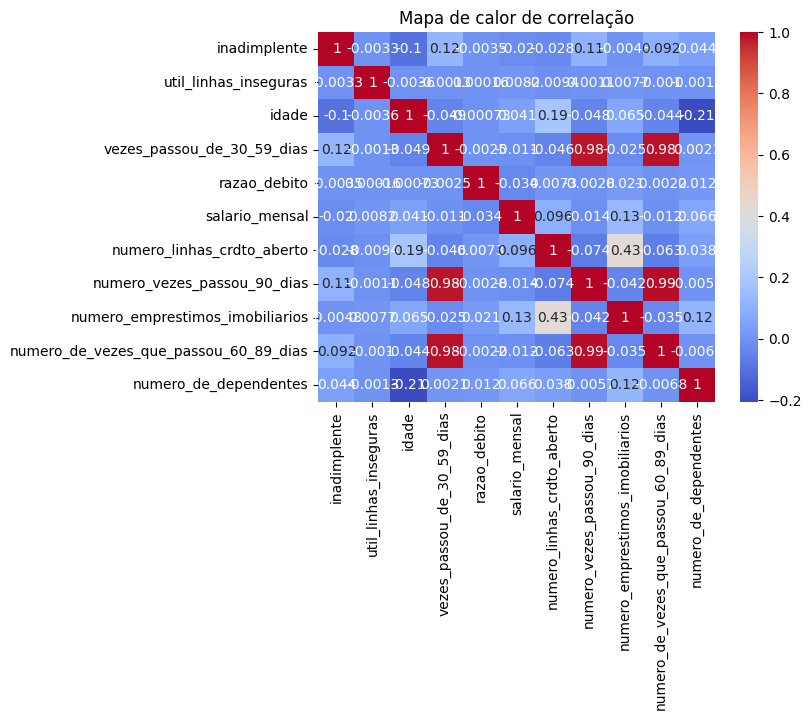

In [16]:
#importar as bibliotecas:
import seaborn as sns
import matplotlib.pyplot as plt

# calcular a matriz de correlação
corr_matrix = df_treino_teste.corr()

# plotar o mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlação')
plt.show()

##### Grafico de barras para demonstrar os 4 fatores que mais influenciam na inadimplência no caso estudado:

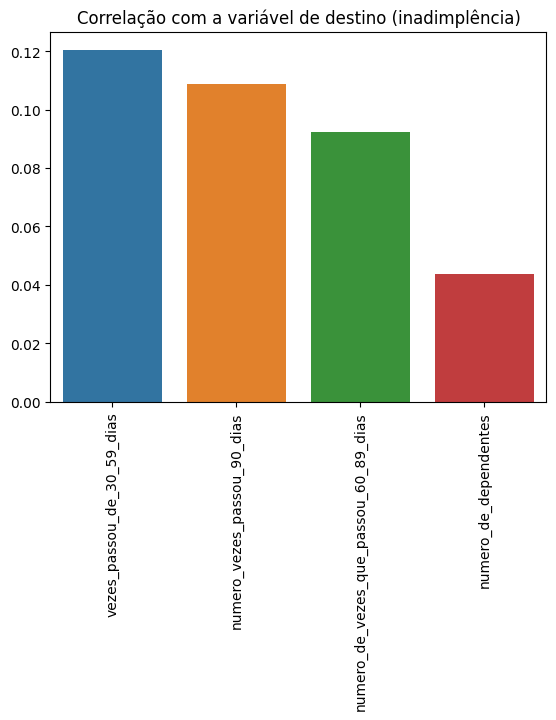

In [17]:
# extrair as correlações com a variável de destino
corr_with_target = corr_matrix['inadimplente'].sort_values(ascending=False)[1:5]

# plotar o gráfico de barras
plt.figure()
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.title('Correlação com a variável de destino (inadimplência)')
plt.xticks(rotation=90)
plt.show()